(1344, 1344)
Classe CorrosÃ£o não encontrada no catalogo
Classe CorrosÃ£o não encontrada no catalogo
number of polygons in object: 1
number of holes: 0/1

Classe CorrosÃ£o não encontrada no catalogo
Classe CorrosÃ£o não encontrada no catalogo
number of polygons in object: 1
number of holes: 0/1

Classe CorrosÃ£o não encontrada no catalogo
Classe CorrosÃ£o não encontrada no catalogo
number of polygons in object: 1
number of holes: 0/1

Classe CorrosÃ£o não encontrada no catalogo
Classe CorrosÃ£o não encontrada no catalogo
number of polygons in object: 1
number of holes: 0/1

Classe CorrosÃ£o não encontrada no catalogo
Classe CorrosÃ£o não encontrada no catalogo
number of polygons in object: 1
number of holes: 0/1

Classe CorrosÃ£o não encontrada no catalogo
Classe CorrosÃ£o não encontrada no catalogo
number of polygons in object: 1
number of holes: 0/1

Classe CorrosÃ£o não encontrada no catalogo
Classe CorrosÃ£o não encontrada no catalogo
number of polygons in object: 1
number of holes

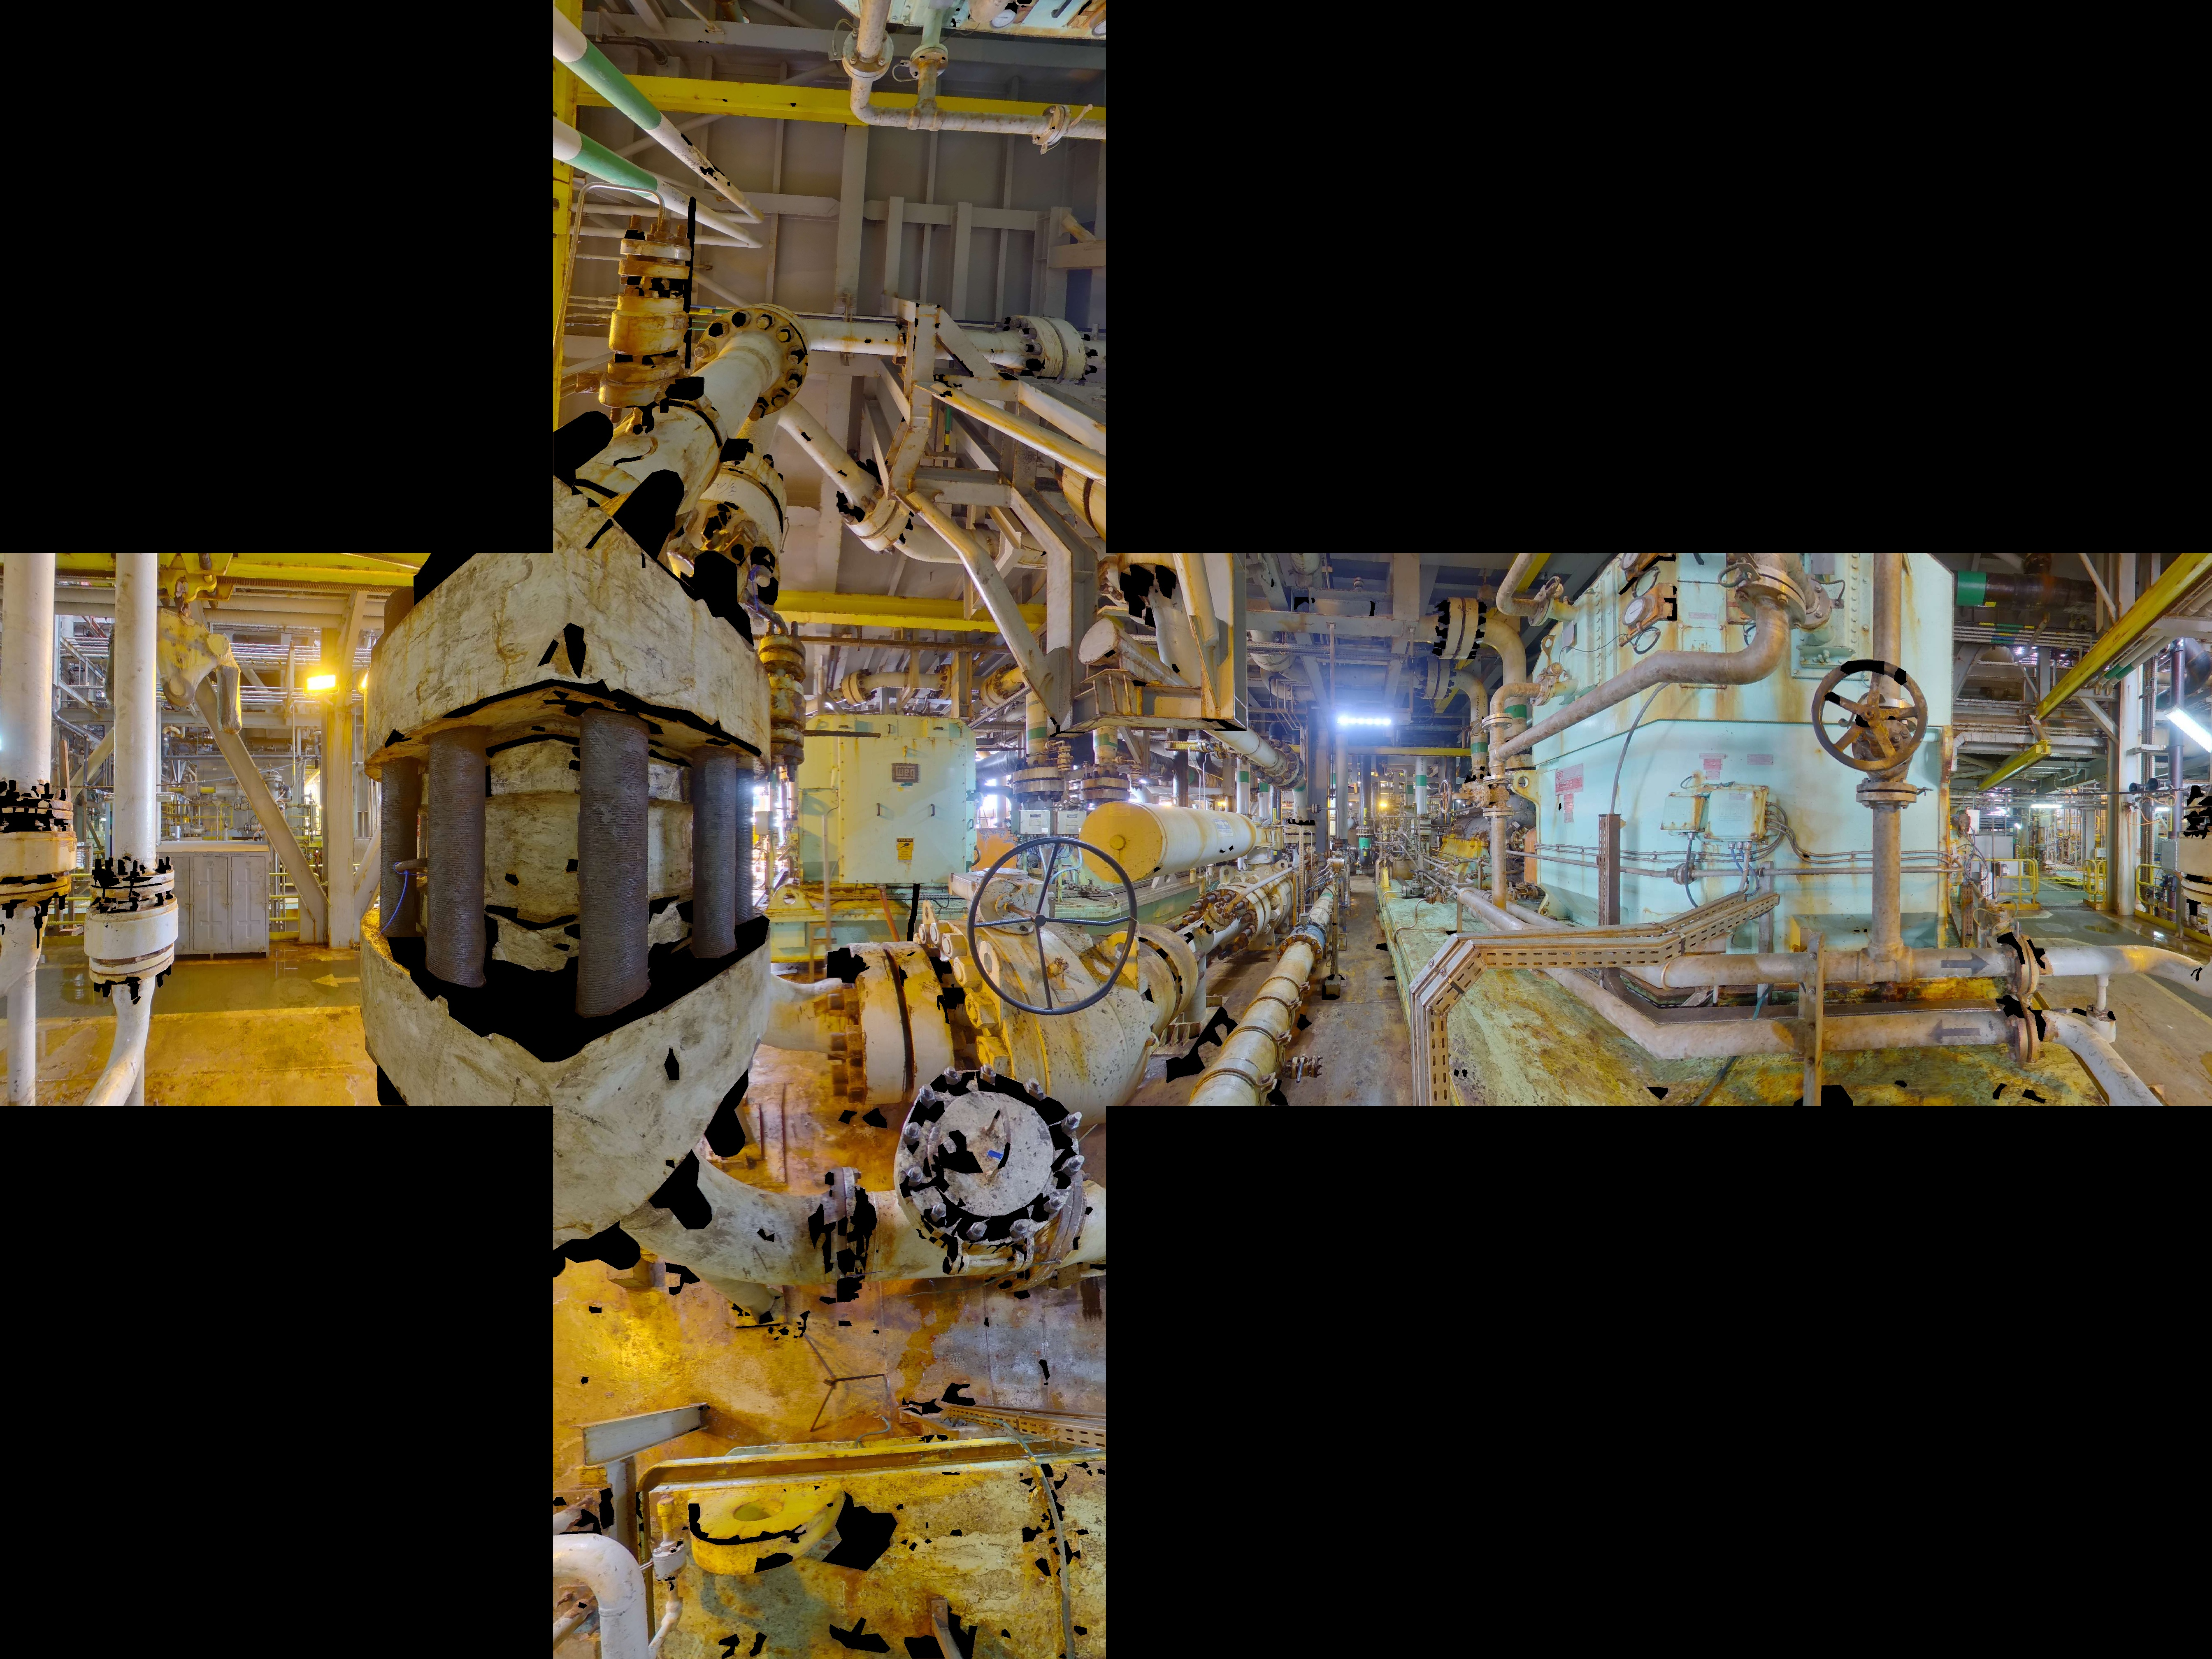

In [1]:
import cv2
import numpy as np
import json
from shapely import Polygon
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import IPython
from utils import classname_to_color_mapper

def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret,width=1000,height=1000)
    IPython.display.display(i)


#label_path = 'datasets/darwin_export_test/labels/test/cubemap_P74_d31875d361c6cbcfbce07cf0ad147d8b_posy.txt'
#img_name = 'datasets/darwin_export_test/images/test/cubemap_P74_d31875d361c6cbcfbce07cf0ad147d8b_posy.png'
img_name = 'cubemap_P74_00c590f7cd08c56d9d73390dd2a085b5'
img_name_posx = img_name+'_posx'
img_name_negx = img_name+'_negx'
img_name_posy = img_name+'_posy'
img_name_negy = img_name+'_negy'
img_name_posz = img_name+'_posz'
img_name_negz = img_name+'_negz'
face_path_list = [img_name_posx,img_name_negx,img_name_posy,img_name_negy,img_name_posz,img_name_negz]


image = Image.open(f"SISTEMAS_UFF/Images/{img_name_posx}.png")
width,height = image.size

complete_image = np.zeros((height*3,width*4,4))

image = image.convert("RGBA")

# Create a new image with an alpha channel
image_with_alpha = Image.new("RGBA", image.size)

# Create a drawing context for the image with an alpha channel
draw = ImageDraw.Draw(image_with_alpha)

if img_name.endswith("posx"):
    pass
elif img_name.endswith("negx"):
    pass
elif img_name.endswith("negy"):
    image = image.rotate(270)
    pass
elif img_name.endswith("posy"):
    image = image.rotate(90)
    pass
elif img_name.endswith("posz"):
    pass
elif img_name.endswith("negz"):
    pass

alpha_value = 150
outline_width = 3

print(image.size)
for face_name in face_path_list:
    
    image = Image.open(f"SISTEMAS_UFF/Images/{face_name}.png")
    image = image.convert("RGBA")

    if face_name.endswith("PosX"):
        pass
    elif face_name.endswith("NegX"):
        pass
    elif face_name.endswith("negy"):
        image = image.rotate(270)
        pass
    elif face_name.endswith("posy"):
        image = image.rotate(90)
        pass
    elif face_name.endswith("PosZ"):
        pass
    elif face_name.endswith("NegZ"):
        pass

    img = np.array(image) 
    
    height_pos = 0
    width_pos = 0
    if face_name.endswith("posx"):
        height_pos = 1
        width_pos = 2
        pass
    elif face_name.endswith("negx"):
        height_pos = 1
        width_pos = 0
        pass
    elif face_name.endswith("negy"):
        height_pos = 0
        width_pos = 1
        pass
    elif face_name.endswith("posy"):
        height_pos = 2
        width_pos = 1
        pass
    elif face_name.endswith("posz"):
        height_pos = 1
        width_pos = 1
        pass
    elif face_name.endswith("negz"):
        height_pos = 1
        width_pos = 3
        pass
    complete_image[height*height_pos:height*(height_pos+1),width*width_pos:width*(width_pos+1),:] = img

complete_image = Image.fromarray(np.uint8(complete_image))


data = json.load(open(f"SISTEMAS_UFF/corrosion-v3/{img_name[8:]}.json"))
for object in data["annotations"]:

    # parse the polygon point list to a list of lists
    polygon_point_list = []
    for point_list in object["polygon"]["paths"]:
        polygon_point_list.append([(point_list[i]["x"], point_list[i]["y"]) for i in range(len(point_list))])

    # define class colors
    fill_color = classname_to_color_mapper(object["name"])
    outline_color = classname_to_color_mapper(object["name"],255)

    # create the layer in which annotation are going to be drawn
    image_with_alpha = Image.new("RGBA", complete_image.size)
    image_with_alpha.putalpha(0)
    draw = ImageDraw.Draw(image_with_alpha)
    
    # create a list of polygons object to calculate holes
    poly_list = [Polygon(polygon_point_list[i]) for i in range(len(polygon_point_list))]
    print(f"number of polygons in object: {len(poly_list)}")

    # the holes will be drawn at the end
    holes_list_to_be_draw_later = []
    
    # for each polygon inside a object
    for i in range(len(polygon_point_list)):
        polygon_to_draw = polygon_point_list[i]
        polya = poly_list[i]
        area_superposition_count = 0

        # for each polygon, how many polygons is it inside of
        for polyb in poly_list:
            if polya != polyb:
                try:
                    polyb_contains_polya = polyb.contains(polya)
                    if polyb_contains_polya:
                        area_superposition_count+=1
                except:
                    print("Some error ocorred with:")
                    print(polyb)
                    print(polya)
                    print("---------------------------------------------------------------")
                    #fill_color = (0,0,0,255)
                    #raise TypeError("Esse erro")
    
        classe = 0
        #if is a hole, drawn later
        if area_superposition_count%2==1:
            classe+=8
            holes_list_to_be_draw_later.append(polygon_to_draw)

            # drawing the main polygons
        else:
            draw.polygon(polygon_to_draw, fill=(fill_color), outline=(outline_color), width=outline_width)
        
    print(f"number of holes: {len(holes_list_to_be_draw_later)}/{len(poly_list)}")
    print(f"")

    # drawing the holes
    for hole in holes_list_to_be_draw_later:

        draw.polygon(hole, fill=0, outline=(outline_color), width=outline_width)
    complete_image = Image.alpha_composite(complete_image, image_with_alpha)
            
        #break
        

try:
    complete_image.save("apresentações/"+img_name)
except:
    print("Could not save image")

complete_image = np.array(complete_image) 

complete_image[..., :3] = complete_image[..., 2::-1]


imshow(complete_image)
#plt.imshow(img,cmap='gray')
#plt.show()